# **Data Preparation**

**Data Import**

In [ ]:
import pandas as pd


In [ ]:
# Load the cleaned dataset
file_path = "/content/Total, all sectors.xlsx"
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, sheet_name="Table_5_01", skiprows=2)


**Data Cleaning**

In [ ]:
# Rename columns
df.columns = ["Year", "Residential", "Commercial", "Industrial", "Transportation", "All Sectors"]
df = df.dropna(subset=["Year"])
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")


In [ ]:
# Convert other columns to numeric
for col in ["Residential", "Commercial", "Industrial", "Transportation", "All Sectors"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")


In [ ]:
df = df.dropna().reset_index(drop=True)

# **Analysis**

In [ ]:
# Create a copy for analysis
df_analysis = df.copy()


**Calculate Year-over-Year (YoY) Growth**

In [ ]:
# Calculate Year-over-Year (YoY) Growth
for col in ["Residential", "Commercial", "Industrial", "Transportation", "All Sectors"]:
    df_analysis[f"{col} YoY Growth (%)"] = df_analysis[col].pct_change() * 100


**Calculate Sector Contribution**

In [ ]:
# Calculate Sector Contribution
for col in ["Residential", "Commercial", "Industrial", "Transportation"]:
    df_analysis[f"{col} Contribution (%)"] = (df_analysis[col] / df_analysis["All Sectors"]) * 100


In [ ]:
# Display the first few rows
df_analysis.head()


,Year,Residential,Commercial,Industrial,Transportation,All Sectors,Residential YoY Growth (%),Commercial YoY Growth (%),Industrial YoY Growth (%),Transportation YoY Growth (%),All Sectors YoY Growth (%),Residential Contribution (%),Commercial Contribution (%),Industrial Contribution (%),Transportation Contribution (%)
0,2014.0,1407208.0,1352158.0,997576.0,7758.0,3764700.0,NaN,NaN,NaN,NaN,NaN,37.379021,35.916753,26.498154,0.206072
1,2015.0,1404096.0,1360752.0,986508.0,7637.0,3758992.0,-0.221147,0.635577,-1.109489,-1.559680,-0.151619,37.352993,36.199917,26.243951,0.203166
2,2016.0,1411058.0,1367191.0,976715.0,7497.0,3762462.0,0.495835,0.473194,-0.992693,-1.833181,0.092312,37.503581,36.337669,25.959465,0.199258
3,2017.0,1378648.0,1352888.0,984298.0,7523.0,3723356.0,-2.296858,-1.046160,0.776378,0.346805,-1.039373,37.027026,36.335177,26.435775,0.202049
4,2018.0,1469093.0,1381755.0,1000673.0,7665.0,3859185.0,6.560413,2.133732,1.663622,1.887545,3.648026,38.067442,35.804321,25.929646,0.198617


In [ ]:
# Summarize total electricity consumption by sector
sector_totals = df[["Residential", "Commercial", "Industrial", "Transportation"]].sum()

# Identify the sector with the highest total electricity consumption
highest_contributor = sector_totals.idxmax()
print(f"The sector contributing the most to electricity consumption is: {highest_contributor}")
print(sector_totals.sort_values(ascending=False))

The sector contributing the most to electricity consumption is: Residential
Residential       21123324.0
Commercial        19966291.0
Industrial        14534058.0
Transportation      103006.0
dtype: float64


In [ ]:
# Save the analysis data to a single CSV file
df_analysis.to_csv("Electricity_Analysis.csv", index=False)


# **Data Exploration**

In [ ]:
import matplotlib.pyplot as plt


**Trend Analysis**

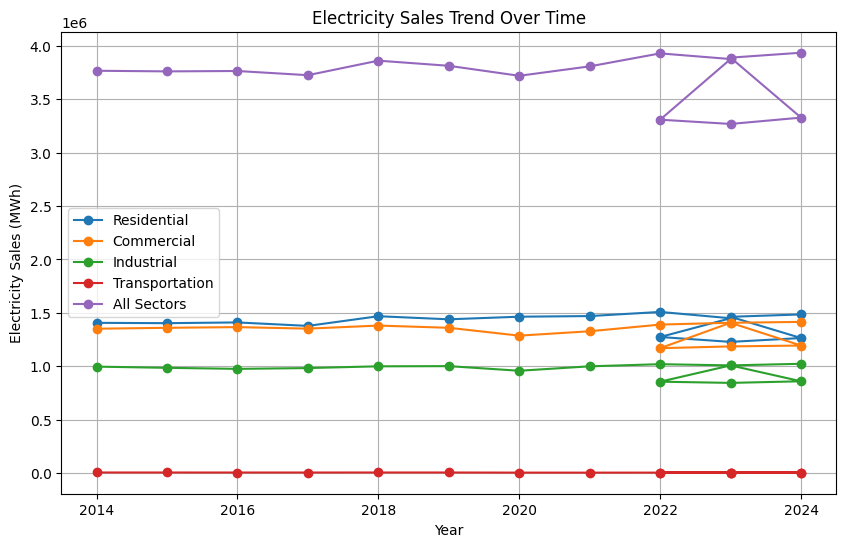

In [ ]:
plt.figure(figsize=(10, 6))

# Plot each sector
for col in ["Residential", "Commercial", "Industrial", "Transportation", "All Sectors"]:
    plt.plot(df["Year"], df[col], marker="o", linestyle="-", label=col)

plt.xlabel("Year")
plt.ylabel("Electricity Sales (MWh)")
plt.title("Electricity Sales Trend Over Time")
plt.legend()
plt.grid(True)
plt.show()


**Year-over-Year (YoY) Growth**

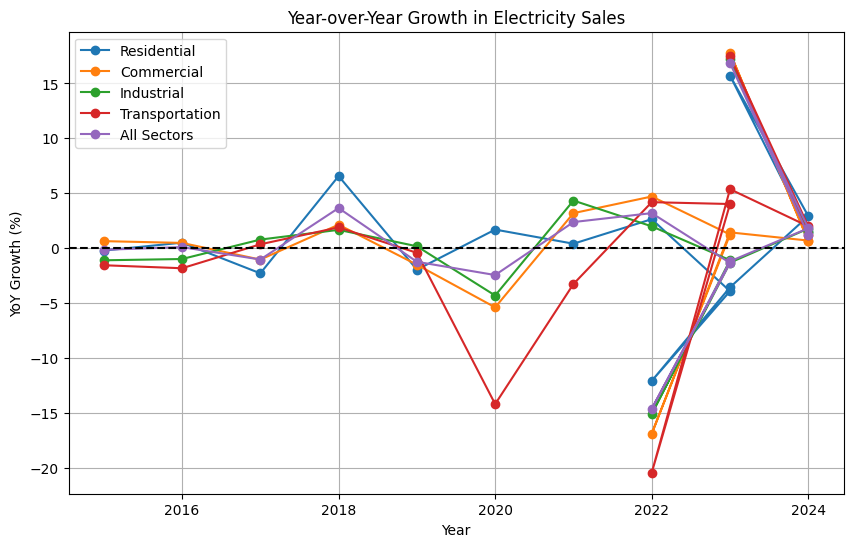

In [ ]:
# Calculate Year-over-Year Growth
df_growth = df.copy()
for col in ["Residential", "Commercial", "Industrial", "Transportation", "All Sectors"]:
    df_growth[f"{col} YoY Growth (%)"] = df_growth[col].pct_change() * 100

# Plot YoY Growth
plt.figure(figsize=(10, 6))
for col in ["Residential", "Commercial", "Industrial", "Transportation", "All Sectors"]:
    plt.plot(df_growth["Year"], df_growth[f"{col} YoY Growth (%)"], marker="o", linestyle="-", label=col)

plt.axhline(y=0, color="black", linestyle="--")  # Reference line for zero growth
plt.xlabel("Year")
plt.ylabel("YoY Growth (%)")
plt.title("Year-over-Year Growth in Electricity Sales")
plt.legend()
plt.grid(True)
plt.show()


**Sector Contribution**

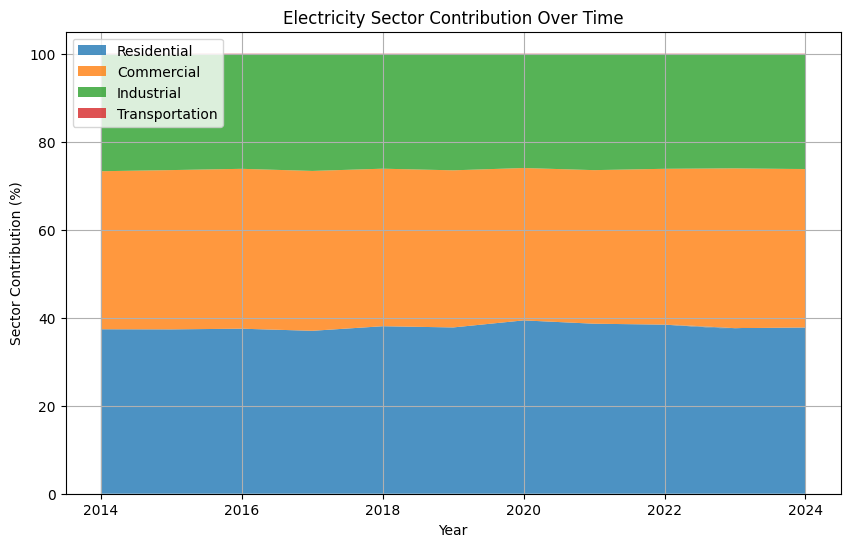

In [ ]:
# Calculate Sector Contribution
df_contribution = df.copy()
for col in ["Residential", "Commercial", "Industrial", "Transportation"]:
    df_contribution[f"{col} Contribution (%)"] = (df_contribution[col] / df_contribution["All Sectors"]) * 100

# Plot Stacked Area Chart
plt.figure(figsize=(10, 6))
plt.stackplot(df_contribution["Year"],
              df_contribution["Residential Contribution (%)"],
              df_contribution["Commercial Contribution (%)"],
              df_contribution["Industrial Contribution (%)"],
              df_contribution["Transportation Contribution (%)"],
              labels=["Residential", "Commercial", "Industrial", "Transportation"],
              alpha=0.8)

plt.xlabel("Year")
plt.ylabel("Sector Contribution (%)")
plt.title("Electricity Sector Contribution Over Time")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


# **Forecasting**

In [ ]:
pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
# Prepare data for Prophet (it requires 'ds' for dates and 'y' for values)
df_prophet = df[["Year", "All Sectors"]].rename(columns={"Year": "ds", "All Sectors": "y"})


In [ ]:
# Convert 'ds' to datetime format
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"], format="%Y")


In [ ]:
# Define and fit the model
model = Prophet()
model.fit(df_prophet)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpti_q3boz/_ump66cb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpti_q3boz/4chjv9qv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95404', 'data', 'file=/tmp/tmpti_q3boz/_ump66cb.json', 'init=/tmp/tmpti_q3boz/4chjv9qv.json', 'output', 'file=/tmp/tmpti_q3boz/prophet_modely3wlw7ri/prophet_model-20250126111944.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:19:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:

In [ ]:
# Create future dates for forecasting (next 10 years)
future = model.make_future_dataframe(periods=10, freq="Y")


In [ ]:
# Generate forecast
forecast = model.predict(future)


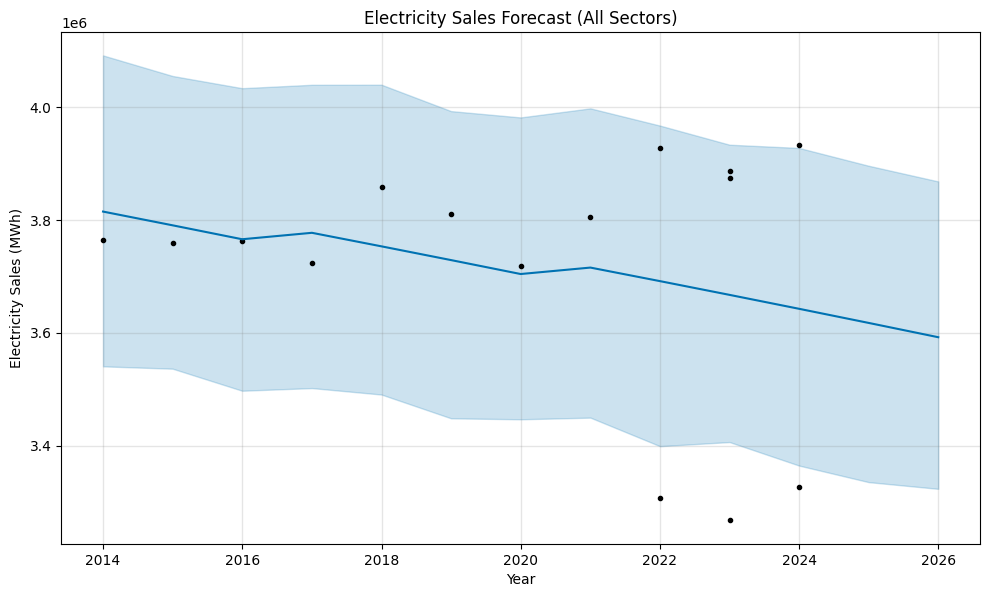

In [ ]:
# Plot forecast
fig = model.plot(forecast)
plt.title("Electricity Sales Forecast (All Sectors)")
plt.xlabel("Year")
plt.ylabel("Electricity Sales (MWh)")
plt.show()


In [ ]:
# Show forecasted values
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(10)

,ds,yhat,yhat_lower,yhat_upper
3,2017-01-01,3.777146e+06,3.501970e+06,4.039449e+06
4,2018-01-01,3.753139e+06,3.490505e+06,4.039575e+06
5,2019-01-01,3.728786e+06,3.448399e+06,3.992812e+06
6,2020-01-01,3.704095e+06,3.446647e+06,3.981614e+06
7,2021-01-01,3.715519e+06,3.449592e+06,3.997667e+06
8,2022-01-01,3.691512e+06,3.399035e+06,3.967161e+06
9,2023-01-01,3.667159e+06,3.406322e+06,3.933277e+06
10,2024-01-01,3.642468e+06,3.364611e+06,3.927503e+06
11,2024-12-31,3.617448e+06,3.335294e+06,3.895963e+06
12,2025-12-31,3.592106e+06,3.323415e+06,3.868216e+06


**Forecasting for Individual Sectors**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpti_q3boz/ekeco59o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpti_q3boz/gk3frxe2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83006', 'data', 'file=/tmp/tmpti_q3boz/ekeco59o.json', 'init=/tmp/tmpti_q3boz/gk3frxe2.json', 'output', 'file=/tmp/tmpti_q3boz/prophet_modelj9qbd7al/prophet_model-20250126112350.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:23:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:23:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:

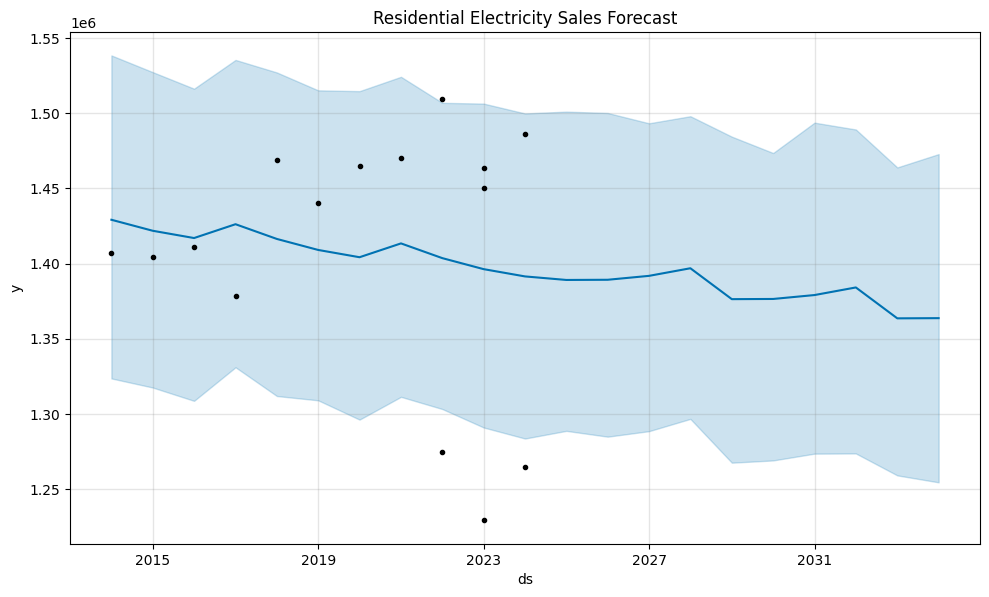

In [ ]:
df_prophet = df[["Year", "Residential"]].rename(columns={"Year": "ds", "Residential": "y"})
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"], format="%Y")
model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=10, freq="Y")
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title("Residential Electricity Sales Forecast")
plt.show()


**Commercial**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpti_q3boz/c0ojcgwx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpti_q3boz/vldiql6w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6087', 'data', 'file=/tmp/tmpti_q3boz/c0ojcgwx.json', 'init=/tmp/tmpti_q3boz/vldiql6w.json', 'output', 'file=/tmp/tmpti_q3boz/prophet_modelxv3po9dd/prophet_model-20250126112533.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:25:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:25:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

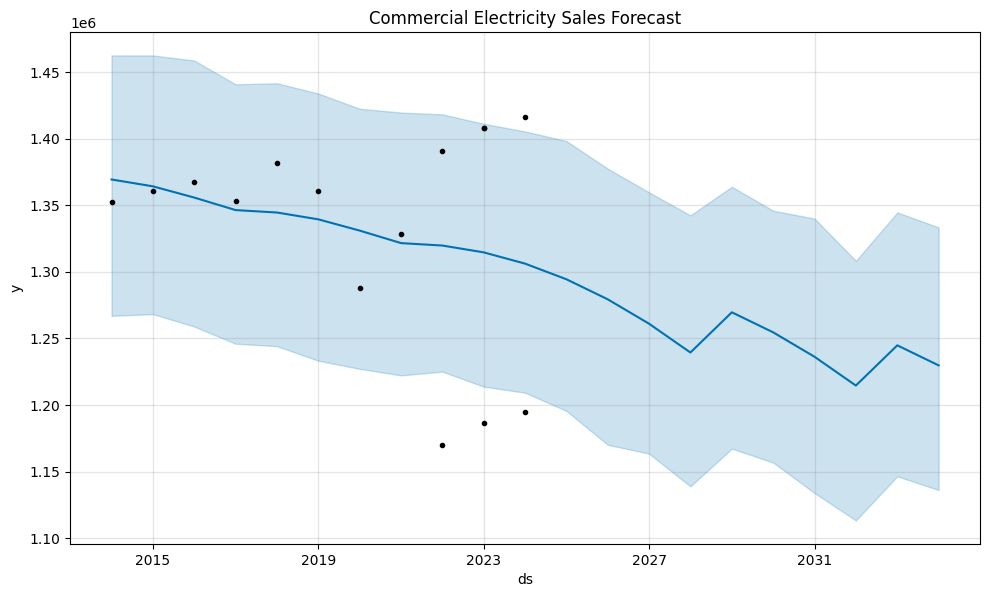

In [ ]:
df_prophet = df[["Year", "Commercial"]].rename(columns={"Year": "ds", "Commercial": "y"})
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"], format="%Y")
model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=10, freq="Y")
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title("Commercial Electricity Sales Forecast")
plt.show()


**Industrial**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpti_q3boz/dqon4duc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpti_q3boz/falqjvzi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59647', 'data', 'file=/tmp/tmpti_q3boz/dqon4duc.json', 'init=/tmp/tmpti_q3boz/falqjvzi.json', 'output', 'file=/tmp/tmpti_q3boz/prophet_modelg1xhjv26/prophet_model-20250126112714.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:27:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:27:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:

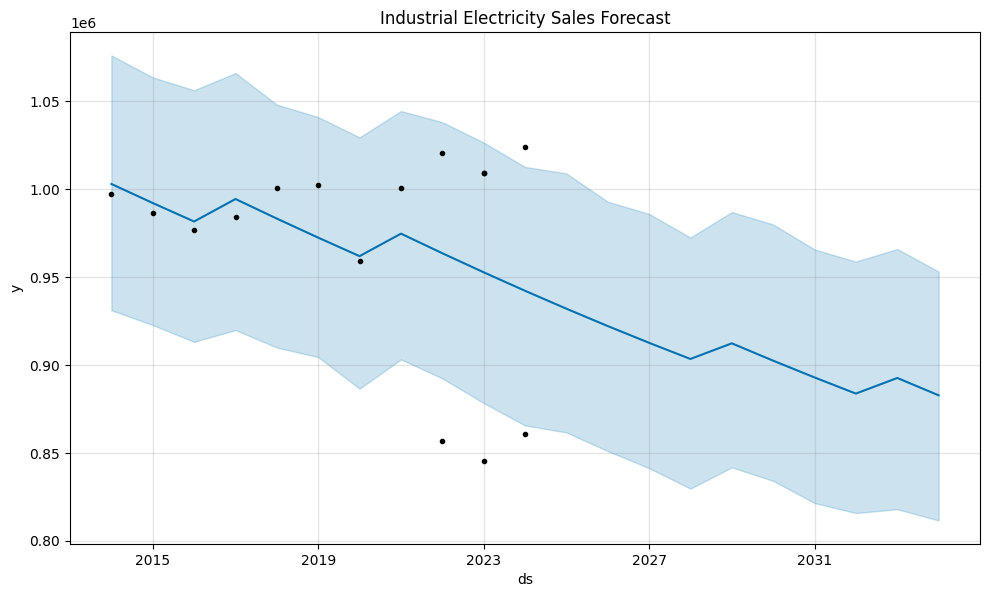

In [ ]:
df_prophet = df[["Year", "Industrial"]].rename(columns={"Year": "ds", "Industrial": "y"})
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"], format="%Y")
model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=10, freq="Y")
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title("Industrial Electricity Sales Forecast")
plt.show()


**Transportation**

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpti_q3boz/w3rcdtt4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpti_q3boz/a4v5wak_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40454', 'data', 'file=/tmp/tmpti_q3boz/w3rcdtt4.json', 'init=/tmp/tmpti_q3boz/a4v5wak_.json', 'output', 'file=/tmp/tmpti_q3boz/prophet_modelsz3ta0r5/prophet_model-20250126112752.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
11:27:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:27:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:

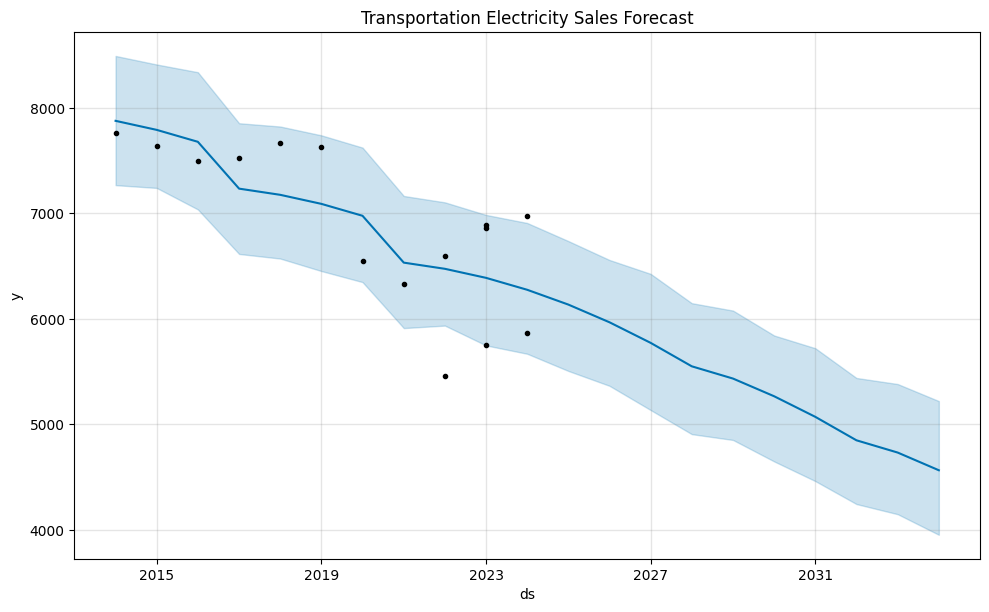

In [ ]:
df_prophet = df[["Year", "Transportation"]].rename(columns={"Year": "ds", "Transportation": "y"})
df_prophet["ds"] = pd.to_datetime(df_prophet["ds"], format="%Y")
model = Prophet()
model.fit(df_prophet)
future = model.make_future_dataframe(periods=10, freq="Y")
forecast = model.predict(future)
fig = model.plot(forecast)
plt.title("Transportation Electricity Sales Forecast")
plt.show()
